In [1]:
from uf3.jax.jax_splines import *
from uf3.util.random import random_spline

import jax.numpy as jnp
from jax import jit, grad, vmap, value_and_grad
import jax

import numpy as onp

import ndsplines

import time
import timeit

import matplotlib.pyplot as plt

from jax.config import config
config.update("jax_enable_x64", True)

# Benchmarks for Splines

## The fastest backend for cubic splines
- (1D and 3D)
- CPU vs GPU

### 1D

In [2]:
seed = 123
dimension = 1
resolution = 20
degree = 3
max_time = 1
repeats=4

timings = {}

settings = {
    'cpu_symbolic': (BSplineBackend.Symbolic, 'cpu'),
    'cpu_deBoor' : (BSplineBackend.DeBoor, 'cpu'),
    'gpu_symbolic' : (BSplineBackend.Symbolic, 'gpu'),
    'gpu_deBoor' : (BSplineBackend.DeBoor, 'gpu')
}

for key in settings.keys():
    timings[key] = None
    backend, device = settings[key]

    for exponent in range(2,8):
        start_time = time.time()

        size = 10 ** exponent
        res = (resolution,) * dimension
        ds = (degree,) * dimension

        c, k, x = random_spline(res, sample=size, seed=seed)
        s = ndSpline_unsafe(c, k, ds, backend=backend)

        x_jax = jax.device_put(x)

        fn = jit(vmap(s), backend=device)

        sym = lambda : fn(x_jax).block_until_ready()

        try:
            t = timeit.Timer(sym).repeat(repeat=4, number=1)
        except RuntimeError:
            break

        t_old = timings[key]

        t_new = onp.asarray([size] + t)
        
        print(f"{key}: 10e{exponent} - {t_new}")

        if t_old is None:
            timings[key] = t_new
        else:
            timings[key] = onp.vstack([t_old,t_new])

        if time.time() - start_time > max_time * 60:
            break


cpu_symbolic: 10e2 - [1.00000000e+02 3.32736057e-01 1.01609156e-04 4.84716147e-05
 5.12748957e-05]
cpu_symbolic: 10e3 - [1.00000000e+03 3.07276078e-01 1.67711638e-04 1.23434700e-04
 1.14860944e-04]
cpu_symbolic: 10e4 - [1.00000000e+04 3.09506909e-01 9.81008634e-04 9.81403515e-04
 9.68863256e-04]
cpu_symbolic: 10e5 - [1.00000000e+05 3.45234572e-01 1.13203935e-02 1.11529445e-02
 1.09365275e-02]
cpu_symbolic: 10e6 - [1.00000000e+06 4.94143595e-01 1.64955443e-01 1.65220853e-01
 1.64060029e-01]
cpu_symbolic: 10e7 - [1.00000000e+07 2.24864943e+00 1.86656776e+00 2.63613413e+00
 2.10174926e+00]
cpu_deBoor: 10e2 - [1.00000000e+02 2.62530379e-01 1.07496977e-04 5.47859818e-05
 5.55934384e-05]
cpu_deBoor: 10e3 - [1.00000000e+03 2.41164458e-01 2.15590931e-04 1.66161917e-04
 1.67848542e-04]
cpu_deBoor: 10e4 - [1.00000000e+04 2.55890458e-01 2.32744124e-03 2.32506450e-03
 2.35082489e-03]
cpu_deBoor: 10e5 - [1.00000000e+05 3.23207528e-01 4.68394170e-02 4.69417740e-02
 4.65576341e-02]
cpu_deBoor: 10e6 -

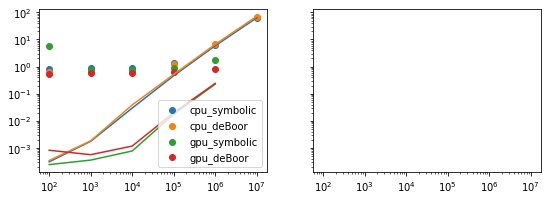

In [8]:
keys = [['cpu_symbolic','cpu_deBoor','gpu_symbolic','gpu_deBoor']]

fig, axs = plt.subplots(1,2, figsize=(9,3), sharex=True, sharey=True)

for i, per_device in zip(range(len(keys)),keys):
    ax = axs[i]
    for k in per_device:
        data = timings[k]
        x = data[:,0]
        y_jit = data[:,1]
        y = onp.mean(data[:,2:], 1)

        ax.plot(x, y)
        ax.set_xscale('log')
        ax.scatter(x, y_jit, label=k)
        ax.set_yscale('log')
        ax.legend()


plt.show()


### 3D

In [4]:
seed = 123
dimension = 3
resolution = 20
degree = 3
max_time = 1
repeats=4

timings = {}

settings = {
    'cpu_symbolic': (BSplineBackend.Symbolic, 'cpu'),
    'cpu_deBoor' : (BSplineBackend.DeBoor, 'cpu'),
    'gpu_symbolic' : (BSplineBackend.Symbolic, 'gpu'),
    'gpu_deBoor' : (BSplineBackend.DeBoor, 'gpu')
}

for key in settings.keys():
    timings[key] = None
    backend, device = settings[key]

    for exponent in range(2,8):
        start_time = time.time()

        size = 10 ** exponent
        res = (resolution,) * dimension
        ds = (degree,) * dimension

        c, k, x = random_spline(res, sample=size, seed=seed)
        s = ndSpline_unsafe(c, k, ds, backend=backend)

        x_jax = jax.device_put(x)

        fn = jit(vmap(s), backend=device)

        sym = lambda : fn(x_jax).block_until_ready()

        try:
            t = timeit.Timer(sym).repeat(repeat=4, number=1)
        except RuntimeError:
            break

        t_old = timings[key]

        t_new = onp.asarray([size] + t)
        
        print(f"{key}: 10e{exponent} - {t_new}")

        if t_old is None:
            timings[key] = t_new
        else:
            timings[key] = onp.vstack([t_old,t_new])

        if time.time() - start_time > max_time * 60:
            break


cpu_symbolic: 10e2 - [1.00000000e+02 8.28815642e-01 3.55380587e-04 2.87971459e-04
 2.80644745e-04]
cpu_symbolic: 10e3 - [1.00000000e+03 8.52945044e-01 1.74687710e-03 1.81865878e-03
 1.72557775e-03]
cpu_symbolic: 10e4 - [1.00000000e+04 8.78107704e-01 2.79613249e-02 3.03532686e-02
 3.02640926e-02]
cpu_symbolic: 10e5 - [1.00000000e+05 1.35061918e+00 4.47193937e-01 4.03271220e-01
 5.34606120e-01]
cpu_symbolic: 10e6 - [1.00000000e+06 6.28587005e+00 5.89856163e+00 5.70969071e+00
 5.98710769e+00]
cpu_symbolic: 10e7 - [1.00000000e+07 6.15920844e+01 6.09810988e+01 6.73935079e+01
 5.94893436e+01]
cpu_deBoor: 10e2 - [1.00000000e+02 6.25926415e-01 4.41366807e-04 2.95053236e-04
 3.00643966e-04]
cpu_deBoor: 10e3 - [1.00000000e+03 6.25059328e-01 2.01305095e-03 1.76946539e-03
 1.73294730e-03]
cpu_deBoor: 10e4 - [1.00000000e+04 7.14944464e-01 3.52045810e-02 3.85371391e-02
 4.21734294e-02]
cpu_deBoor: 10e5 - [1.00000000e+05 1.23201221e+00 5.31397456e-01 4.83357826e-01
 5.32909569e-01]
cpu_deBoor: 10e6 -

2022-07-02 18:34:32.391442: W external/org_tensorflow/tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 39.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


gpu_deBoor: 10e2 - [1.00000000e+02 5.43676545e-01 1.46893132e-03 5.31723723e-04
 4.70538624e-04]
gpu_deBoor: 10e3 - [1.00000000e+03 5.90414205e-01 6.30524009e-04 5.36080450e-04
 5.31647354e-04]
gpu_deBoor: 10e4 - [1.00000000e+04 5.94668639e-01 1.13586616e-03 1.26075372e-03
 1.13111455e-03]
gpu_deBoor: 10e5 - [1.00000000e+05 6.19243050e-01 1.98295703e-02 1.96991656e-02
 2.00498747e-02]
gpu_deBoor: 10e6 - [1.00000000e+06 8.15307498e-01 2.42675026e-01 2.41796072e-01
 2.40807231e-01]


2022-07-02 18:34:37.359198: W external/org_tensorflow/tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 39.43GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


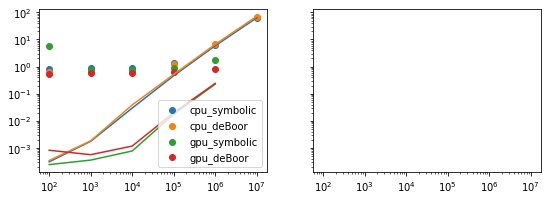

In [7]:
keys = [['cpu_symbolic','cpu_deBoor' ,'gpu_symbolic','gpu_deBoor']]

fig, axs = plt.subplots(1,2, figsize=(9,3), sharex=True, sharey=True)

for i, per_device in zip(range(len(keys)),keys):
    ax = axs[i]
    for k in per_device:
        data = timings[k]
        x = data[:,0]
        y_jit = data[:,1]
        y = onp.mean(data[:,2:], 1)

        ax.plot(x, y)
        ax.set_xscale('log')
        ax.scatter(x, y_jit, label=k)
        ax.set_yscale('log')
        ax.legend()


plt.show()


## Comparing to other implementations (1D cubic)

- JAX
- ndspline
- scipy

In [9]:
seed = 123
dimension = 1
resolution = 20
degree = 3
max_time = 1
repeats=4

timings = {}

settings = {
    'JAX' : ('jax', BSplineBackend.DeBoor, 'cpu'),
    'ND-Splines' : ('ndspline',None,None),
    # 'SciPy' : ('scipy',None,None)
}

for key in settings.keys():
    timings[key] = None
    name, backend, device = settings[key]

    for exponent in range(2,7):
        start_time = time.time()

        size = 10 ** exponent
        res = (resolution,) * dimension
        ds = (degree,) * dimension

        c, k, x = random_spline(res, sample=size, seed=seed)

        sym = None
        if name == 'jax':
            s = ndSpline_unsafe(c, k, ds, backend=backend)

            x_jax = jax.device_put(x)

            fn = jit(vmap(s), backend=device)

            sym = lambda : fn(x_jax).block_until_ready()
        elif name == 'ndspline':
            knots = []
            for a in k:
                knots.append(onp.asarray(a))
            s = ndsplines.NDSpline(knots, onp.asarray(c), ds)
            xs = onp.asarray(x)
            def fn():
                s(xs)
            sym = fn
        elif name == 'SciPy':
            pass

        try:
            t = timeit.Timer(sym).repeat(repeat=4, number=1)
        except RuntimeError:
            break

        t_old = timings[key]

        t_new = onp.asarray([size] + t)
        
        print(f"{key}: 10e{exponent} - {t_new}")

        if t_old is None:
            timings[key] = t_new
        else:
            timings[key] = onp.vstack([t_old,t_new])

        if time.time() - start_time > max_time * 60:
            break


JAX: 10e2 - [1.00000000e+02 2.68787968e-01 1.11071393e-04 6.78813085e-05
 5.76702878e-05]
JAX: 10e3 - [1.00000000e+03 2.55987439e-01 2.40275636e-04 1.82310119e-04
 1.74134038e-04]
JAX: 10e4 - [1.00000000e+04 2.71272251e-01 2.80557107e-03 2.59021483e-03
 2.46345904e-03]
JAX: 10e5 - [1.00000000e+05 3.41593463e-01 4.90268096e-02 4.73243035e-02
 4.78764530e-02]
JAX: 10e6 - [1.00000000e+06 7.83338702e-01 5.03240653e-01 4.80618259e-01
 4.75083133e-01]
ND-Splines: 10e2 - [1.00000000e+02 1.27185159e-01 2.40964815e-04 1.29126012e-04
 3.36244702e-05]
ND-Splines: 10e3 - [1.00000000e+03 2.23253854e-04 1.05765648e-04 9.75066796e-05
 9.49501991e-05]
ND-Splines: 10e4 - [1.00000000e+04 1.17194094e-03 8.69968906e-04 7.44953752e-04
 7.42935576e-04]
ND-Splines: 10e5 - [1.00000000e+05 8.40066373e-03 7.74842314e-03 7.63290748e-03
 7.41290580e-03]
ND-Splines: 10e6 - [1.00000000e+06 1.25062173e-01 9.29510007e-02 8.23834110e-02
 8.25391207e-02]


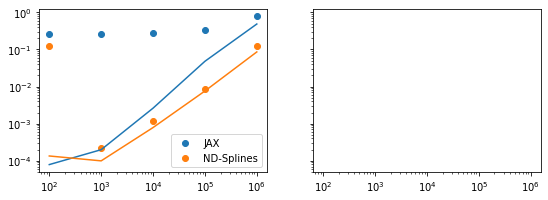

In [10]:
keys = [['JAX','ND-Splines']]

fig, axs = plt.subplots(1,2, figsize=(9,3), sharex=True, sharey=True)

for i, per_device in zip(range(len(keys)),keys):
    ax = axs[i]
    for k in per_device:
        data = timings[k]
        x = data[:,0]
        y_jit = data[:,1]
        y = onp.mean(data[:,2:], 1)

        ax.plot(x, y)
        ax.set_xscale('log')
        ax.scatter(x, y_jit, label=k)
        ax.set_yscale('log')
        ax.legend()


plt.show()


## Effects of higher degrees (deBoor backend and ndspline)

In [11]:
seed = 123
dimension = 1
resolution = 40
degree = 3
max_time = 1
repeats=4

timings = {}

settings = {
    'JAX' : ('jax', BSplineBackend.DeBoor, 'cpu'),
    'ND-Splines' : ('ndspline',None,None),
}

for key in settings.keys():
    timings[key] = None
    name, backend, device = settings[key]

    exponent = 4
    for degree in range(3,10):
        start_time = time.time()

        size = 10 ** exponent
        res = (resolution,) * dimension
        ds = (degree,) * dimension

        c, k, x = random_spline(res, degrees=ds, sample=size, seed=seed)

        sym = None
        if name == 'jax':
            s = ndSpline_unsafe(c, k, ds, backend=backend)

            x_jax = jax.device_put(x)

            fn = jit(vmap(s), backend=device)

            sym = lambda : fn(x_jax).block_until_ready()
        elif name == 'ndspline':
            knots = []
            for a in k:
                knots.append(onp.asarray(a))
            s = ndsplines.NDSpline(knots, onp.asarray(c), ds)
            xs = onp.asarray(x)
            def fn():
                s(xs)
            sym = fn

        try:
            t = timeit.Timer(sym).repeat(repeat=4, number=1)
        except RuntimeError:
            break

        t_old = timings[key]

        t_new = onp.asarray([degree] + t)
        
        print(f"{key}: {degree} - {t_new}")

        if t_old is None:
            timings[key] = t_new
        else:
            timings[key] = onp.vstack([t_old,t_new])

        if time.time() - start_time > max_time * 60:
            break


JAX: 3 - [3.00000000e+00 2.68930671e-01 2.59858277e-03 2.61953752e-03
 2.57652812e-03]
JAX: 4 - [4.00000000e+00 2.43772216e-01 3.65382805e-03 3.60930152e-03
 3.61925270e-03]
JAX: 5 - [5.         0.26940828 0.00693479 0.00684177 0.00690269]
JAX: 6 - [6.         0.28278317 0.00911589 0.0091323  0.00951012]
JAX: 7 - [7.         0.29440155 0.01172982 0.01453828 0.0151879 ]
JAX: 8 - [8.         0.28734131 0.01862048 0.01548378 0.01822407]
JAX: 9 - [9.         0.29594817 0.01951332 0.01944107 0.02159557]
ND-Splines: 3 - [3.00000000e+00 1.03595015e-03 8.46775249e-04 7.97845423e-04
 7.89036974e-04]
ND-Splines: 4 - [4.00000000e+00 1.15653686e-03 1.03108492e-03 1.01812277e-03
 1.01702288e-03]
ND-Splines: 5 - [5.00000000e+00 1.36813708e-03 1.29323360e-03 1.25729199e-03
 1.25365984e-03]
ND-Splines: 6 - [6.00000000e+00 1.63172092e-03 1.54984556e-03 1.60071626e-03
 1.50551088e-03]
ND-Splines: 7 - [7.00000000e+00 1.85482204e-03 1.74509175e-03 1.76069420e-03
 1.79023389e-03]
ND-Splines: 8 - [8.0000000

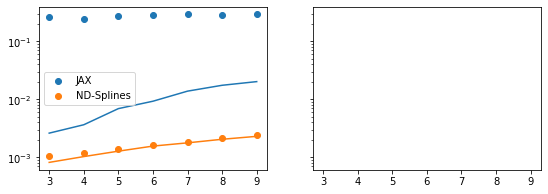

In [12]:
keys = [['JAX','ND-Splines']]

fig, axs = plt.subplots(1,2, figsize=(9,3), sharex=True, sharey=True)

for i, per_device in zip(range(len(keys)),keys):
    ax = axs[i]
    for k in per_device:
        data = timings[k]
        x = data[:,0]
        y_jit = data[:,1]
        y = onp.mean(data[:,2:], 1)

        ax.plot(x, y)
        # ax.set_xscale('log')
        ax.scatter(x, y_jit, label=k)
        ax.set_yscale('log')
        ax.legend()


plt.show()


## Effects of higher dimensions

In [13]:
seed = 123
dimension = 1
resolution = 7
degree = 3
max_time = 1
repeats=4

timings = {}

settings = {
    'JAX' : ('jax', BSplineBackend.DeBoor, 'cpu'),
    'ND-Splines' : ('ndspline',None,None),
}

for key in settings.keys():
    timings[key] = None
    name, backend, device = settings[key]

    exponent = 4
    for dimension in range(1,6):
        start_time = time.time()

        size = 10 ** exponent
        res = (resolution,) * dimension
        ds = (degree,) * dimension

        c, k, x = random_spline(res, degrees=ds, sample=size, seed=seed)

        sym = None
        if name == 'jax':
            s = ndSpline_unsafe(c, k, ds, backend=backend)

            x_jax = jax.device_put(x)

            fn = jit(vmap(s), backend=device)

            sym = lambda : fn(x_jax).block_until_ready()
        elif name == 'ndspline':
            knots = []
            for a in k:
                knots.append(onp.asarray(a))
            s = ndsplines.NDSpline(knots, onp.asarray(c), ds)
            xs = onp.asarray(x)
            def fn():
                s(xs)
            sym = fn

        try:
            t = timeit.Timer(sym).repeat(repeat=4, number=1)
        except RuntimeError:
            break

        t_old = timings[key]

        t_new = onp.asarray([dimension] + t)
        
        print(f"{key}: {dimension} - {t_new}")

        if t_old is None:
            timings[key] = t_new
        else:
            timings[key] = onp.vstack([t_old,t_new])

        if time.time() - start_time > max_time * 60:
            break


JAX: 1 - [1.         0.26377664 0.00211014 0.00219541 0.00195608]
JAX: 2 - [2.         0.47666394 0.00433682 0.00436623 0.00466245]
JAX: 3 - [3.         0.68629481 0.00957835 0.00793964 0.0089574 ]
JAX: 4 - [4.         0.91925078 0.01498748 0.01598586 0.01573396]
JAX: 5 - [5.         1.25577021 0.07343918 0.07312821 0.07675034]
ND-Splines: 1 - [1.00000000e+00 1.02783181e-03 7.99580477e-04 7.49440864e-04
 7.50603154e-04]
ND-Splines: 2 - [2.         0.01757904 0.00317538 0.00296276 0.00300686]
ND-Splines: 3 - [3.         0.02020497 0.01622131 0.0166934  0.01648148]
ND-Splines: 4 - [4.         0.11237708 0.09696192 0.09888016 0.09811207]
ND-Splines: 5 - [5.         0.61325774 0.55451929 0.56805601 0.55743139]


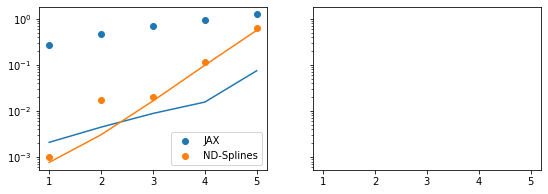

In [14]:
keys = [['JAX','ND-Splines']]

fig, axs = plt.subplots(1,2, figsize=(9,3), sharex=True, sharey=True)

for i, per_device in zip(range(len(keys)),keys):
    ax = axs[i]
    for k in per_device:
        data = timings[k]
        x = data[:,0]
        y_jit = data[:,1]
        y = onp.mean(data[:,2:], 1)

        ax.plot(x, y)
        # ax.set_xscale('log')
        ax.scatter(x, y_jit, label=k)
        ax.set_yscale('log')
        ax.legend()


plt.show()


## Effect of increased knot resolution

1D and 3D splines - fastest backend

# Profiling

In [6]:
seed = 123
size = 100
dimension = 1
resolution = 150
degree = 3

res = (resolution,) * dimension
ds = (degree,) * dimension

c, k, x = random_spline(res, sample=size, seed=seed)
s = ndSpline_unsafe(c, k, ds, backend=BSplineBackend.Symbolic, naive_search=False)

x_jax = jax.device_put(x)
fn = jit(vmap(s))

with jax.profiler.trace("/tmp/jax-trace1", create_perfetto_link=False):
    fn(x_jax).block_until_ready()
    fn(x_jax).block_until_ready()

In [ ]:
seed = 123
size = 100000
dimension = 1
resolution = 15
degree = 3

res = (resolution,) * dimension
ds = (degree,) * dimension

c, k, x = random_spline(res, sample=size, seed=seed)

print(len(k[0]))

def search(x):
    return jnp.searchsorted(k[0],x,side='right')

def find(x):
    return jnp.argmax(k[0]>x, 0)

x_jax = jax.device_put(x)
fn1 = jit(vmap(search))
fn2 = jit(vmap(find))
a = fn1(x_jax).block_until_ready()
b = fn2(x_jax).block_until_ready()

# with jax.profiler.trace("/tmp/tensorboard"):
#     a = fn1(x_jax).block_until_ready()
#     b = fn2(x_jax).block_until_ready()
    # (a-b).block_until_ready()
    # print(a-b)

## Memory usage

In [ ]:
seed = 123
size = 1000000
dimension = 3
resolution = 20
degree = 3

res = (resolution,) * dimension
ds = (degree,) * dimension

c, k, x = random_spline(res, sample=size, seed=seed)
s = ndSpline_unsafe(c, k, ds, backend=BSplineBackend.DeBoor, naive_search=False)
sd = ndSpline_unsafe(c, k, ds, backend=BSplineBackend.DeBoor, naive_search=False)

x_jax = jax.device_put(x)
fn = jit(vmap(s))
fnd = jit(vmap(sd))
a = fn(x_jax)

a.block_until_ready()

jax.profiler.save_device_memory_profile("symbolic-memory.prof")

ad = fnd(x_jax).block_until_ready()

ad.block_until_ready()

jax.profiler.save_device_memory_profile("deBoor-memory.prof")

